In [27]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bless\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bless\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
df = pd.read_csv(r'C:\Users\bless\OneDrive\Desktop\week-2\nova-financial-analysis\data\raw\raw_analyst_ratings.csv')  

In [36]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [37]:
print(df['publisher'].value_counts())

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [42]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

In [43]:
failed = df[df['date'].isna()]
print(f"Failed to parse {len(failed)} rows")

Failed to parse 0 rows


In [44]:
print(df['date'].dtype)

datetime64[ns, UTC]


In [45]:
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour


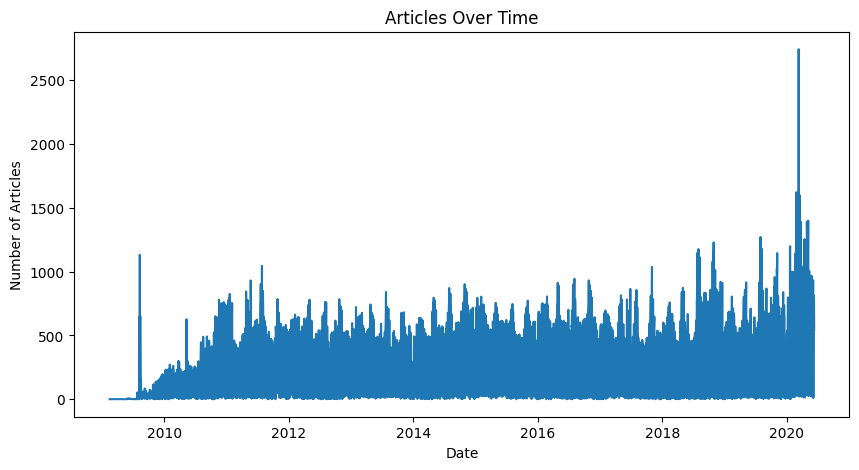

In [46]:
df['date_only'] = df['date'].dt.date
df['date_only'].value_counts().sort_index().plot(kind='line', figsize=(10,5), title='Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

<Axes: title={'center': 'Publishing Times Histogram'}, ylabel='Frequency'>

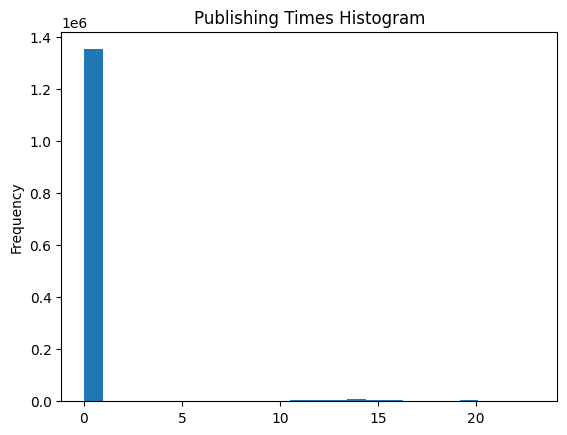

In [47]:
df['hour'].plot(kind='hist', bins=24, title='Publishing Times Histogram')

In [48]:
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['headline'])
print(vectorizer.get_feature_names_out())

['announces' 'benzinga' 'buy' 'downgrades' 'earnings' 'eps' 'est' 'market'
 'mid' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'trading'
 'update' 'vs' 'week']


In [49]:
df['domain'] = df['publisher'].str.extract('@(.+)$')
print(df['domain'].value_counts())


domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64
